<a href="https://colab.research.google.com/github/ChunxiaqiuY/BA865-Neural_NetworkAnalytics_Team_Real/blob/main/BA865_FakeJobAnalyse_TeamReal_Draft2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##BA865 Team Real - Fake Job Analyise
Members: Yipeng(Caroline) Guo: ypguo@bu.edu

Yilun(Allen) Wang: yilun830@bu.edu

Niming(Danny) Wang: wang2021@bu.edu

Mochi Zhang: zhangmc@bu.edu

Chunxiaqiu(Tommy) Yang: chunqiu@bu.edu



#Business Problem & Motivation
The problem motivates us is the possibility of identifying fake job recruiting news


1.   Recognition of fake job posting by deep learning (NN) technologies, including transfering text into code, MLP model trainging and testing.
2.   Exploration of creating fraud testing system to ensure safe hiring environment.

The rational behind this is that, with the growth of unemployed and job gaps due to economic stres and Covid impcat, there are multiple websites or Apps that provide job recruting, applying, and other posting. However, scammers may take advantage of this and post fake job information to gather applicants' personal information and privacy. The project aims to distinguish real and fake job recruiting news.






##Dataset

https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction

The Employment Scam Aegean Dataset was explicitly granted and acknowledged by the Laboratory of Information & Communication System Security, The University of the Aegean (http://emscad.samos.aegean.gr/). With thousands of hiring news collected with their detailed description, it allows us to dig deeper than we would imagine. This dataset contains 18K posting entries with 18 features captured, out of which about 800 are fake. It consists of both textual information and meta-information about the jobs.

In [1]:
! pip install mlxtend
! pip install scikit-plot
! pip install newspaper3k
! pip install -U spacy
! pip install -U textacy
! pip install wordcloud
! pip install emoji
! pip install nltk
! pip install scikit-plot
! pip install spacytextblob
! pip install afinn
! pip install pysrt
! pip install textdescriptives
! pip install tokenwiser
!pip install pyyaml==5.4.1

     |████████████████████████████████| 211 kB 4.6 MB/s 
     |████████████████████████████████| 81 kB 5.2 MB/s 
     |████████████████████████████████| 87 kB 3.2 MB/s 
     |████████████████████████████████| 7.4 MB 6.6 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13553 sha256=0f0aec9cc44dda51d0aca974a424b82b7256af86730b5cf27a7511fc432e8052
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3357 sha256=e76e51d40e83b47911d9ecc610bd95be3b7100f346ae9ce4796329f9f35e5cab
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398404 sha256=e7a52ef4b4553290b944aeb870217de1101f08750c8c9e9e40379f65709922f2
  Stored in directory: /root/.cache/pip/wheels/4c/91/46/3c208287b726df325a5979574324

In [2]:
# imports
# for plotly
import plotly.express as px

from sklearn.datasets import load_digits, fetch_openml
from sklearn.model_selection import train_test_split
import os
import numpy as np
from PIL import Image
import uuid
import pandas as pd
import cv2   
import random
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform
# sklearn does have some functionality too, but mostly a wrapper to scipy
from sklearn.metrics import pairwise_distances 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn import metrics 
from sklearn.datasets import make_blobs
import scikitplot as skplt
import seaborn as sns
import matplotlib.pyplot as plt

#Principal component analysis (PCA) for reducing the dimensionality of data
from sklearn.decomposition import PCA
from sklearn import metrics 
import scikitplot as skplt

# color maps
from matplotlib import cm

# some "fun" packages
from wordcloud import WordCloud
import emoji
import re

# text imports
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer  
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import json

# text imports
from spacy import cli
import textdescriptives as td
import tokenwiser
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
import gensim
from afinn import Afinn
from newspaper import Article
import warnings
warnings.filterwarnings("ignore")

# for distance and h-clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform

#for k-means
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score

# for keras
from tensorflow.keras import utils



/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
#Read the dataset from the github repo
url = "https://raw.githubusercontent.com/ChunxiaqiuY/BA865-Advanced-Analytics_Team-Great/main/fake_job_postings.csv"
df = pd.read_csv(url)
#Basic understanding of the data, sample data
df.sample(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
3981,3983,Event Specialists,"US, OK, Norman",NaN,NaN,We are a digital marketing agency with an emph...,We are seeking entry level and experienced sal...,Backgrounds in these areas work well in this p...,Full Time WorkExperience is not necessary as w...,0,1,1,Full-time,Entry level,High School or equivalent,Marketing and Advertising,Sales,0
3792,3794,Marketing Trainee- Russian Market,"GR, I, Athens",Marketing,NaN,#URL_c379aa631173ed5b7c345ab3f500a9a053e509138...,"As a Russian Marketing Trainee, you will join ...",- Russian native speaker.- Degree ...,- Remuneration Package based on payment ...,0,1,1,NaN,Internship,NaN,NaN,Marketing,0
12951,12953,Senior UX and Digital Designer/Developer for a...,"GB, LND, London",NaN,45000-60000,"Based in Hoxton, London, Forward Partners are ...",Forward Partners is an ecommerce investment st...,THE ROLETo work closely with the Head of Produ...,NaN,0,1,0,Full-time,Mid-Senior level,Unspecified,Internet,Art/Creative,0
6198,6200,Embedded Hardware Engineer,"US, MA, Cambridge",NaN,NaN,"Wallflowr is a Cambridge, MA based company wor...",OverviewWe are a self-funded startup based in ...,- 2+ years of relevant work experience in embe...,- Get into a startup early with an experienced...,0,1,1,Full-time,Not Applicable,Bachelor's Degree,Consumer Electronics,Engineering,0
7026,7028,Technical Operations Consultant,"CA, ON, Toronto",NaN,NaN,NaN,The successful candidate will be responsible f...,Education:Bachelor of Computer Science or Engi...,NaN,0,0,1,Full-time,Mid-Senior level,Unspecified,Marketing and Advertising,Legal,0


In [4]:
##Check missing value in each category
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15011
company_profile         3308
description                1
requirements            2695
benefits                7209
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8104
industry                4902
function                6455
fraudulent                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17879 entries, 0 to 17878
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17879 non-null  int64 
 1   title                17879 non-null  object
 2   location             17533 non-null  object
 3   department           6332 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14571 non-null  object
 6   description          17878 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17879 non-null  int64 
 10  has_company_logo     17879 non-null  int64 
 11  has_questions        17879 non-null  int64 
 12  employment_type      14408 non-null  object
 13  required_experience  10829 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

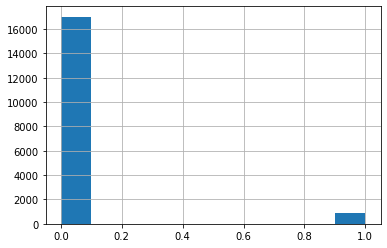

In [6]:
##Basec Statistical information about fraudulent
df.fraudulent.hist()

In [7]:
df[df['fraudulent'] == 1].count()
##That means there are 866 (4.8436%) fake job information in our dataset, 

job_id                 866
title                  866
location               847
department             335
salary_range           223
company_profile        279
description            865
requirements           712
benefits               502
telecommuting          866
has_company_logo       866
has_questions          866
employment_type        625
required_experience    431
required_education     415
industry               591
function               529
fraudulent             866
dtype: int64

##Preprocess & Data Cleaning

In [8]:
# Unknown for missing location
df.location = df.location.fillna('unknown')
# unknown for missing department
df.department = df.department.fillna('unknown')
# fill average for missing salary_range
job_salary = df.copy()
salary_temp = job_salary.salary_range.dropna()
ranges = []
#create lower bond and upper bond for salary 
salary_lower = []
salary_upper = []
for i in salary_temp:
  try:
    ranges.append(int(i.split("-")[0]))
    ranges.append(int(i.split("-")[1]))
  except:
    ranges.append(0)
np.asarray(ranges)
average_salary = np.average(ranges)
df.salary_range = df.salary_range.fillna(average_salary)
for i in df.salary_range:
  if i == average_salary:
    salary_lower.append(-1)
    salary_upper.append(-1)
  else: 
    try:
      salary_lower.append(int(i.split("-")[0]))
      salary_upper.append(int(i.split("-")[1]))
    except:
      salary_lower.append(-1)
      salary_upper.append(-1)
df['salary_lower'] = salary_lower[:17879]
df['salary_upper'] = salary_upper[:17879]
# Unknown for missing company_profile
df['company_profile'] = df['company_profile'].fillna('unknown')
# Unknown for missing description
df['description'] = df['description'].fillna('unknown')
# Unknown for missing requirements
df['requirements'] = df['requirements'].fillna('unknown')
# Unknown for missing employment, then replace the category value to numeric 
df['employment_type'] = df['employment_type'].fillna('unknown')
df['employment_type'].replace(['Full-time', 'Part-time','Contract', 'Temporary', 'Other', 'unknown'],
                        [0, 1, 2, 3, 4, 5], inplace=True)
# Unknown for missing required_experience, then replace the category value to numeric 
df['required_experience'] = df['required_experience'].fillna('unknown')
df['required_experience'].replace(['Not Applicable', 'Mid-Senior level','Associate', 'Entry level', 'Executive', 'Director', 'Internship',
                          'unknown'], [0, 1, 2, 3, 4, 5, 6, 7], inplace=True)
# Unknown for missing benefits
df['benefits'] = df['benefits'].fillna('unknown')
# Unknown for missing required_education
df['required_education'] = df['required_education'].fillna('unknown')
df_re = pd.get_dummies(df, columns=['required_education'])
df_re_dummy = df_re.iloc[:,17:].to_numpy()
# Unknown for missing industry
df['industry'] = df['industry'].fillna('unknown')
df_industry = pd.get_dummies(df, columns=['industry'])
df_industry_dummy = df_industry.iloc[:,17:].to_numpy()
# Unknown for missing function
df['function'] = df['function'].fillna('unknown')
df_function = pd.get_dummies(df, columns=['function'])
df_function_dummy = df_function.iloc[:,17:].to_numpy()
required_experience_c = utils.to_categorical(df['required_experience'])
employment_type_c = utils.to_categorical(df['employment_type'])
#Concatenate all numerical variables and categoralical variables
numeric =  ['salary_lower'] + ['salary_upper'] + ['telecommuting'] + ['has_company_logo'] + ['has_questions']
numeric_cate = np.concatenate((df_re_dummy,df_industry_dummy,df_function_dummy,df[numeric].to_numpy()), axis=1)


In [9]:
##Double check all missing value are properly handled
df.isna().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
salary_lower           0
salary_upper           0
dtype: int64

In [10]:
#Make a copy of the orginal df, use job id as index 
job = df.copy()
job.index = job['job_id']
del job['job_id']
job.drop(['salary_range'], axis=1, inplace=True)

In [11]:
# Let's shuffle things... 
shuffled_indices= np.arange(job.shape[0])
np.random.shuffle(shuffled_indices)

text_info = (job.title + job.location + job['company_profile'] + job.description + job.requirements + job. benefits).to_numpy()
label = np.where(job['fraudulent']==1,1,0)

print(text_info)
text_info = text_info[shuffled_indices]
numeric_cate = numeric_cate[shuffled_indices]
label = label[shuffled_indices]
print(text_info)

["Customer Service - Cloud Video ProductionNZ, , Auckland90 Seconds, the worlds Cloud Video Production Service.90 Seconds is the worlds Cloud Video Production Service enabling brands and agencies to get high quality online video content shot and produced anywhere in the world. 90 Seconds makes video production fast, affordable, and all managed seamlessly in the cloud from purchase to publish. http://90#URL_fbe6559afac620a3cd2c22281f7b8d0eef56a73e3d9a311e2f1ca13d081dd630#90 Seconds removes the hassle, cost, risk and speed issues of working with regular video production companies by managing every aspect of video projects in a beautiful online experience. With a growing global network of over 2,000 rated video professionals in over 50 countries managed by dedicated production success teams in 5 countries, 90 Seconds provides a 100% success guarantee.90 Seconds has produced almost 4,000 videos in over 30 Countries for over 500 Global brands including some of the worlds largest including P

##TextVectorization() Layer

In [12]:
import tensorflow as tf
import string
import re
from tensorflow import keras

def custom_standardization_fn(string_tensor):
    lowercase_string = tf.strings.lower(string_tensor) # We convert upper case characters to lowercase.
    return tf.strings.regex_replace(
        lowercase_string, f"[{re.escape(string.punctuation)}]", "") # We find and remove punctuation.
  
def custom_split_fn(string_tensor):
    return tf.strings.split(string_tensor) # By default the separator is white space.
 
text_vectorization = keras.layers.TextVectorization(
    max_tokens=600,
    output_mode="int",
    standardize=custom_standardization_fn,
    split=custom_split_fn,
)


dataset = text_info
numeric_cate_subset = numeric_cate
text_vectorization.adapt(dataset)
text_vectorization.get_vocabulary()

['',
 '[UNK]',
 'and',
 'to',
 'the',
 'of',
 'a',
 'in',
 'with',
 'for',
 'is',
 'our',
 'we',
 'you',
 'are',
 'as',
 'be',
 'on',
 'work',
 'that',
 'or',
 'will',
 'experience',
 'an',
 'team',
 'have',
 'your',
 'all',
 'business',
 'at',
 'new',
 'company',
 'by',
 'from',
 'their',
 'customer',
 'this',
 'sales',
 'management',
 'amp',
 'development',
 'working',
 'skills',
 'services',
 'it',
 'service',
 '\xa0',
 'us',
 'looking',
 'people',
 'years',
 'other',
 'marketing',
 'who',
 'design',
 'product',
 'can',
 'not',
 'solutions',
 'more',
 'time',
 'clients',
 'data',
 'software',
 'including',
 'support',
 'help',
 'ability',
 'knowledge',
 'web',
 'job',
 'technology',
 'communication',
 'but',
 'provide',
 'customers',
 'about',
 'well',
 'through',
 'quality',
 'best',
 'environment',
 'also',
 'one',
 'project',
 'client',
 'products',
 'technical',
 'has',
 'opportunity',
 'based',
 'up',
 'great',
 'office',
 'high',
 'into',
 'strong',
 'within',
 'position',
 'm

In [13]:
processed_text = text_vectorization(dataset)

In [14]:
#Combine the text vectorization and other categorical variables
goal = pd.DataFrame(processed_text.numpy(), index = range(processed_text.shape[0]), columns = range(processed_text.shape[1]))
goal2 = pd.DataFrame(numeric_cate_subset, index = range(numeric_cate_subset.shape[0]), columns = range(numeric_cate_subset.shape[1]))
horizontal_concat = pd.concat([goal, goal2], axis=1)
horizontal_concat = horizontal_concat.to_numpy()

In [ ]:
#Skip one-hot encoding process because the limit of the RAM
#one_hot = tf.one_hot(horizontal_concat, depth=200)

In [ ]:
# processed_text = text_vectorization(text_info)
# one_hot = tf.one_hot(processed_text, depth=1000) # we one-hot encode those, so it becomes a length x1000 vector.

# print(one_hot.shape)

##EDA

#### First, we want to see the distribution of job location. We have transferred all of the addresses to coordinate file. The notebook for transferring is 
(https://github.com/ChunxiaqiuY/BA865-Neural_NetworkAnalytics_Team_Real/blob/main/Location%20to%20coordinate.ipynb)

#### Next, we input the csv file.

In [ ]:
url = "https://raw.githubusercontent.com/ChunxiaqiuY/BA865-Neural_NetworkAnalytics_Team_Real/main/coordinate.csv"
df2 = pd.read_csv(url)

In [ ]:
#check our coordinate file
df2.head(5)

,Unnamed: 0,formatted_address,latitude,longitude,accuracy,google_place_id,type,postcode,input_string,number_of_results,status
0,0,"Washington, DC, USA",38.907192,-77.036871,APPROXIMATE,ChIJW-T2Wt7Gt4kRKl2I1CJFUsI,"locality,political",NaN,"US, DC, Washington",1,OK
1,1,"DFW International Airport (DFW), 2400 Aviation...",32.899809,-97.040335,ROOFTOP,ChIJpyoiDWYqTIYRHCB9Bl4_MnM,"airport,establishment,point_of_interest",75261,"US, FL, Fort Worth",1,OK
2,2,"Berlin, Germany",52.520007,13.404954,APPROXIMATE,ChIJAVkDPzdOqEcRcDteW0YgIQQ,"locality,political",NaN,"DE, BE, Berlin",1,OK
3,3,"Sydney NSW, Australia",-33.868820,151.209295,APPROXIMATE,ChIJP3Sa8ziYEmsRUKgyFmh9AQM,"colloquial_area,locality,political",NaN,"AU, NSW, Sydney",1,OK
4,4,Singapore,1.355379,103.867744,APPROXIMATE,ChIJyY4rtGcX2jERIKTarqz3AAQ,"locality,political",NaN,"SG, 01, Singapore",1,OK


In [ ]:

# set up the chart from the df dataFrame
fig = px.scatter_geo(df2, 
                     # longitude is taken from the df["lon"] columns and latitude from df["lat"]
                     lon="longitude", 
                     lat="latitude", 
                     # choose the map chart's projection
                     projection="natural earth",
                     # columns which is in bold in the pop up
                     hover_name = "formatted_address",
                     # format of the popup not to display these columns' data
                     hover_data = {"formatted_address":False,
                                   "longitude": False,
                                   "latitude": False
                                     }
                     )


# scatter_geo allow to change the map date based on the information from the df dataframe, but we can separately specify the values that are common to all
# change the size of the markers to 25 and color to red
fig.update_traces(marker=dict(size=7, color="#FFB6C1"))

# fit the map to surround the points
fig.update_geos(fitbounds="locations", showcountries = True)

# add title
fig.update_layout(
        title = 'map of locations'
    )
fig.show()

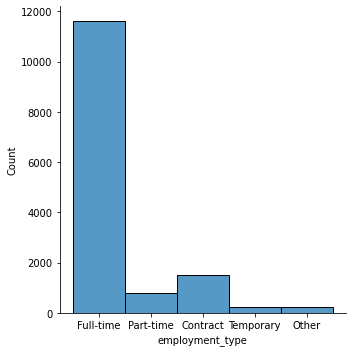

In [ ]:
# check employment type
sns.displot(job_salary,x='employment_type')

Text(0.5, 0, 'Requirement of job')

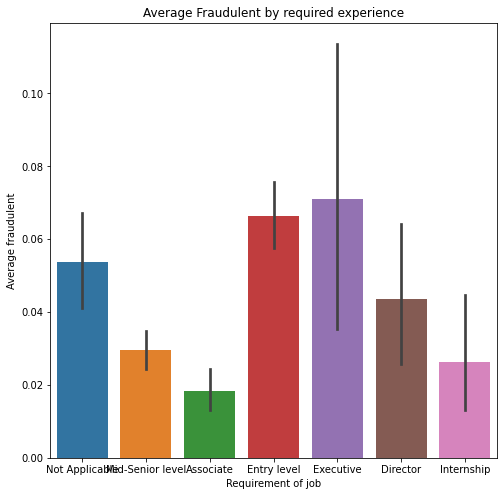

In [ ]:
# check job requirement
plt.figure(figsize=(8,8))
sns.barplot(data=job_salary, x="required_experience", y="fraudulent")
plt.title("Average Fraudulent by required experience")
plt.ylabel("Average fraudulent")
plt.xlabel("Requirement of job")

Text(0.5, 0, 'employment type')

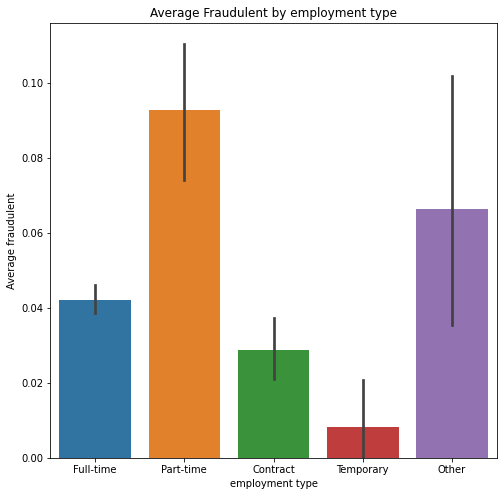

In [ ]:
# Average Fraudulent by employment type
plt.figure(figsize=(8,8))
sns.barplot(data=job_salary, x="employment_type", y="fraudulent")
plt.title("Average Fraudulent by employment type")
plt.ylabel("Average fraudulent")
plt.xlabel("employment type")

Text(0.5, 1.0, 'Histplot of employment_type by target')

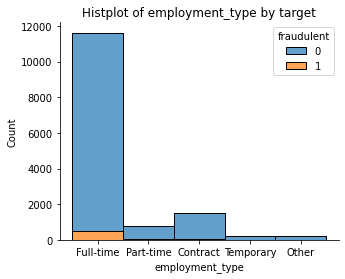

In [ ]:
# Histplot of employment_type by target
plt.figure(figsize=[5,4])
sns.histplot(x="employment_type", hue='fraudulent', edgecolor="black", multiple="stack", alpha=0.7, data=job_salary)
sns.despine()
plt.title("Histplot of employment_type by target")

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

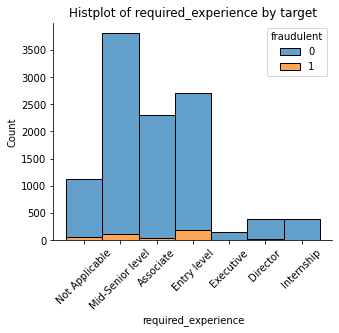

In [ ]:
# Histplot of required_experience by target
import pylab as pl
plt.figure(figsize=[5,4])
sns.histplot(x="required_experience", hue='fraudulent', edgecolor="black", multiple="stack", alpha=0.7, data=job_salary)
sns.despine()
plt.title("Histplot of required_experience by target")
pl.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

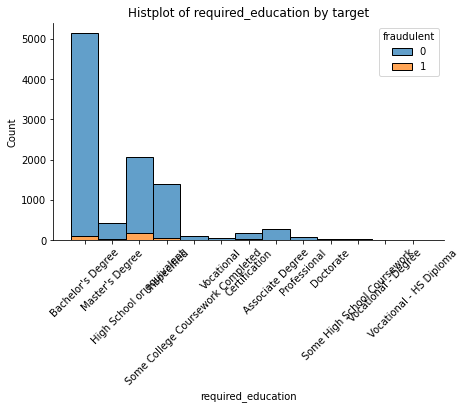

In [ ]:
# Histplot of required_education by target
plt.figure(figsize=[7,4])
sns.histplot(x="required_education", hue='fraudulent', edgecolor="black", multiple="stack", alpha=0.7, data=job_salary)
sns.despine()
plt.title("Histplot of required_education by target")
pl.xticks(rotation=45)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text major ticklabel objects>)

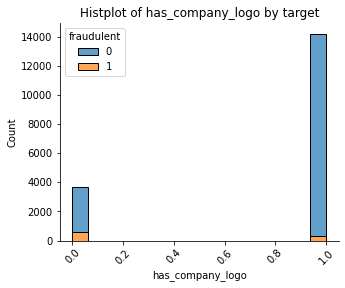

In [ ]:
# Histplot of has_company_logo by target
plt.figure(figsize=[5,4])
sns.histplot(x="has_company_logo", hue='fraudulent', edgecolor="black", multiple="stack", alpha=0.7, data=job_salary)
sns.despine()
plt.title("Histplot of has_company_logo by target")
pl.xticks(rotation=45)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text major ticklabel objects>)

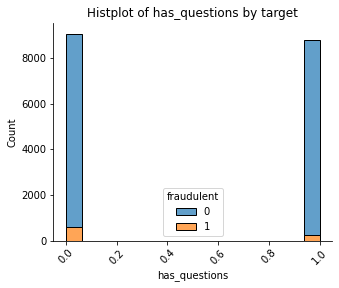

In [ ]:
# Histplot of has_questions by target
plt.figure(figsize=[5,4])
sns.histplot(x="has_questions", hue='fraudulent', edgecolor="black", multiple="stack", alpha=0.7, data=job_salary)
sns.despine()
plt.title("Histplot of has_questions by target")
pl.xticks(rotation=45)

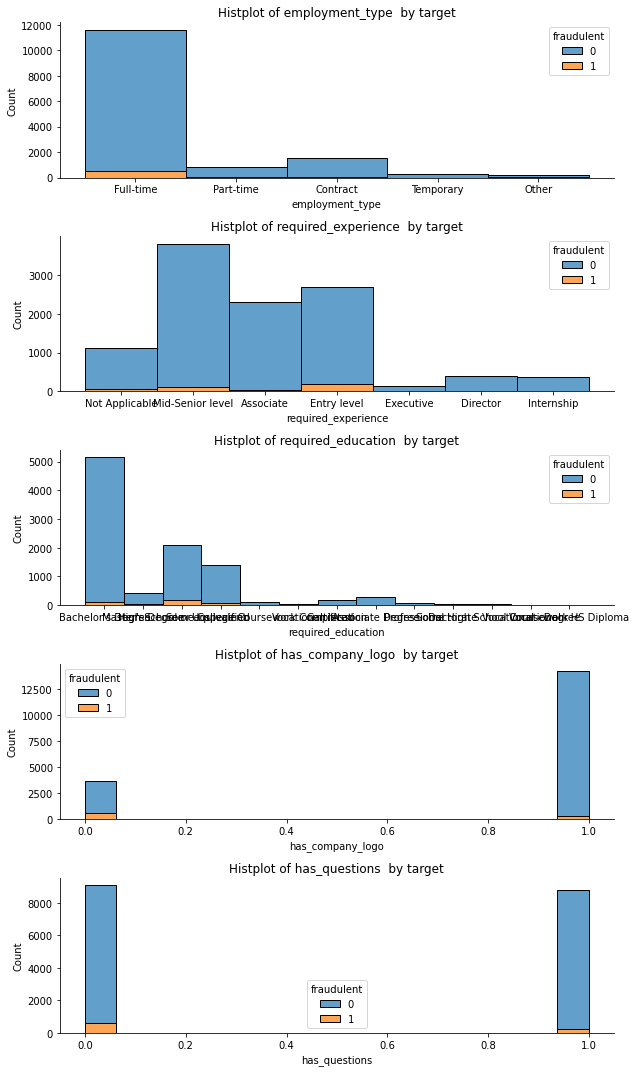

In [ ]:
# Plot the educational condition by target to see the different
plt.figure(figsize=[9,15])
plot=["employment_type", "required_experience", "required_education",'has_company_logo','has_questions']
n=1
for f in plot:
    plt.subplot(5,1,n)
    sns.histplot(x=f, hue='fraudulent', edgecolor="black", multiple="stack", alpha=0.7, data=job_salary)
    sns.despine()
    plt.title("Histplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()

##NN Architecture

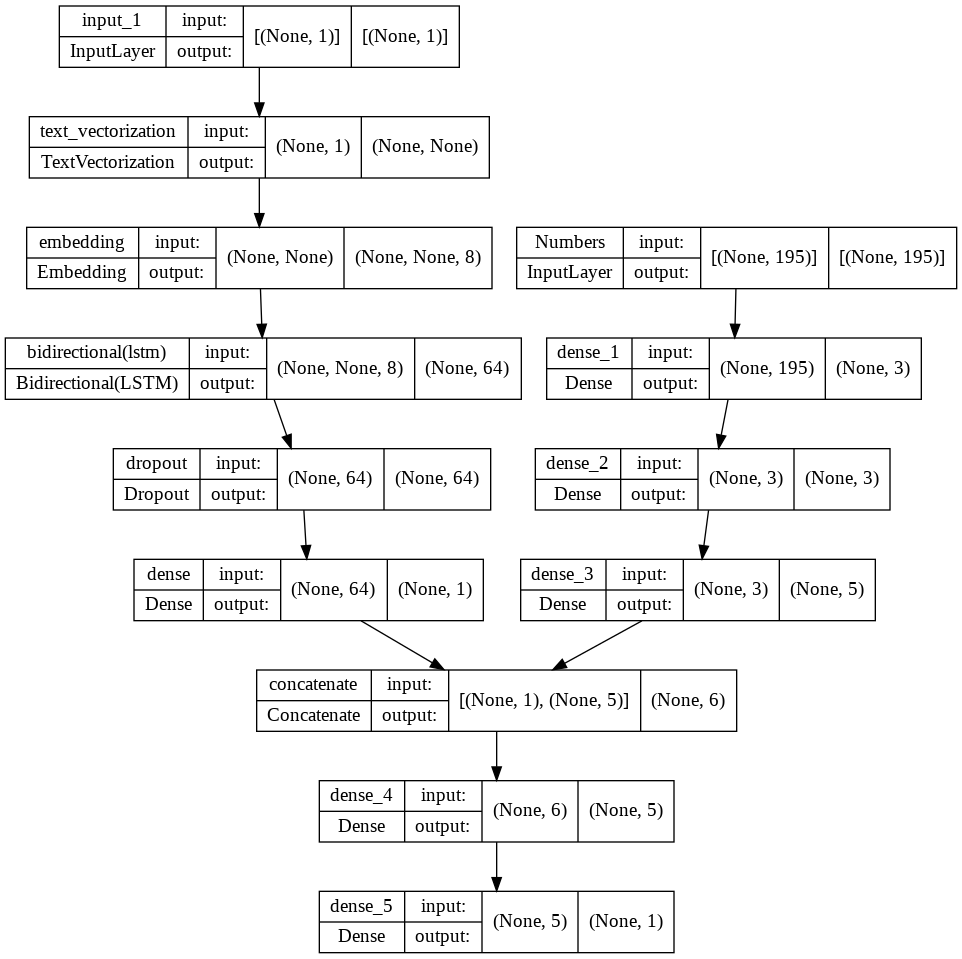

In [ ]:
def build_model_embed():
    inputs = keras.layers.Input(shape=(1), dtype="string") # We take our strings as input
    processing = text_vectorization(inputs)
   
    # Truncates after 600 tokens, and pads up to 600 tokens for shorter reviews.
    # Mask zero means it will skip 0 tokens and will not pass them on.
    embedding = keras.layers.Embedding(input_dim=2000,output_dim=8,input_length=600, mask_zero=True)(processing)
   
    x = keras.layers.Bidirectional(keras.layers.LSTM(32))(embedding)
    x = keras.layers.Dropout(0.5)(x)
    outputs = keras.layers.Dense(1, activation="sigmoid")(x)

    # Define numeric input branch
    input_numeric = keras.layers.Input(numeric_cate_subset.shape[1],name="Numbers")
    x = keras.layers.Dense(3,activation="relu")(input_numeric)
    x = keras.layers.Dense(3,activation="relu")(x)
    numeric_output = keras.layers.Dense(5,activation="linear")(x) #Another option might be to have dense matrices that are wider, and you reshape them to 28x28x3 to add.

    merge = keras.layers.Concatenate()([outputs,numeric_output])
    x = keras.layers.Dense(5,activation="relu")(merge)
    final_output = keras.layers.Dense(1)(x)
 
    model = keras.Model(inputs=[inputs, input_numeric],outputs = final_output)
    model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=['accuracy'])
    return model
model = build_model_embed()

keras.utils.plot_model(model, show_shapes=True)

In [15]:
#split the training and testing 
data_train = text_info[:12516] 
num_train = numeric_cate_subset[:12516]
labels_train = label[:12516]
data_test = text_info[12516:]
num_test = numeric_cate_subset[12516:]
labels_test = label[12516:]

In [ ]:
k = 4
num_validation_samples = len(data_train) // k
num_epochs = 25
batch_sizes = 25
all_loss_histories = []
all_val_loss_histories = []  
all_acc_histories = []
all_val_acc_histories = []

# For each validation fold, we will train a full set of epochs, and store the history. 
for fold in range(k):
    validation_data = data_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    validation_text = num_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    validation_targets = labels_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    training_text = np.concatenate([
        num_train[:num_validation_samples * fold],
        num_train[num_validation_samples * (fold + 1):]])                       
    training_data = np.concatenate([
        data_train[:num_validation_samples * fold],
        data_train[num_validation_samples * (fold + 1):]])
    training_targets = np.concatenate([
        labels_train[:num_validation_samples * fold],
        labels_train[num_validation_samples * (fold + 1):]])
    model = build_model_embed()
    history = model.fit([training_data, training_text], training_targets, 
                        validation_data = ([validation_data,validation_text],validation_targets), 
                        epochs=num_epochs, batch_size=batch_sizes)
    val_loss_history = history.history['val_loss']
    val_acc_history = history.history['val_accuracy']
    loss_history = history.history['loss']
    acc_history = history.history['accuracy']
    all_val_loss_histories.append(val_loss_history)
    all_loss_histories.append(loss_history)
    all_val_acc_histories.append(val_acc_history)
    all_acc_histories.append(acc_history)

average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_val_loss_history = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
average_val_acc_history = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]

Epoch 1/25
376/376 [==============================] - 46s 84ms/step - loss: 2.0993 - accuracy: 0.8448 - val_loss: 2.1533 - val_accuracy: 0.8354
Epoch 2/25
376/376 [==============================] - 27s 71ms/step - loss: 0.9904 - accuracy: 0.9129 - val_loss: 0.6475 - val_accuracy: 0.9380
Epoch 3/25
376/376 [==============================] - 27s 71ms/step - loss: 0.3841 - accuracy: 0.9493 - val_loss: 0.3579 - val_accuracy: 0.9501
Epoch 4/25
376/376 [==============================] - 27s 71ms/step - loss: 0.3652 - accuracy: 0.9526 - val_loss: 0.4202 - val_accuracy: 0.9533
Epoch 5/25
376/376 [==============================] - 27s 71ms/step - loss: 0.3709 - accuracy: 0.9565 - val_loss: 0.3632 - val_accuracy: 0.9591
Epoch 6/25
376/376 [==============================] - 26s 70ms/step - loss: 0.3873 - accuracy: 0.9580 - val_loss: 0.3141 - val_accuracy: 0.9549
Epoch 7/25
376/376 [==============================] - 26s 70ms/step - loss: 0.3614 - accuracy: 0.9592 - val_loss: 0.3596 - val_accuracy:

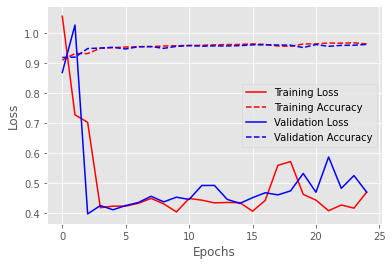

In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

plt.plot(average_loss_history,c='r')
plt.plot(average_acc_history,c="r",linestyle="dashed")
plt.plot(average_val_loss_history,c='b')
plt.plot(average_val_acc_history,c='b',linestyle="dashed")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Training Loss','Training Accuracy','Validation Loss','Validation Accuracy'])
plt.show()

##Pre-trained model - embeddings

In [ ]:
#GloVe Embeddings*
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2022-03-17 07:08:31--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-03-17 07:08:32--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-03-17 07:08:32--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
import numpy as np
path_to_glove_file = "glove.6B.100d.txt" 
  
embeddings_index = {} 
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1) # Split off only the first element in the row, i.e., the word, keep the remaining values as the vector.
        coefs = np.fromstring(coefs, "f", sep=" ") # Convert the set of numeric values into a numpy array, splitting elements by ' '
        embeddings_index[word] = coefs # Populate our dictionary - for this word (key), the vector representation is this vector (value).
  
glove_vec_lengths = len(coefs)

print(f"Found {len(embeddings_index)} word vectors.")
print(f"GloVe vector representations are {glove_vec_lengths} elements long.")

Found 400000 word vectors.
GloVe vector representations are 100 elements long.


In [ ]:
vocabulary = text_vectorization.get_vocabulary()
print(f"Recall that our vocabulary has {len(vocabulary)} tokens in it.")
print(f"Here is the 11th word in our vocabulary: {vocabulary[13]}.") # Recall that the first two indices are reserved for 'padding' and 'UNK'

Recall that our vocabulary has 600 tokens in it.
Here is the 11th word in our vocabulary: you.


In [ ]:
embedding_dim = glove_vec_lengths # The length of the vector representations; the latent embedding space will be in 100 dimensions. 

vocabulary = text_vectorization.get_vocabulary() # From the vocabulary our text vectorizer learned from our dataset, go over every word.
word_index = dict(zip(vocabulary, range(len(vocabulary)))) # Make a dictionary, key is word to value is index.

# Instantiate a matrix of values (these will be the 'weights' in our embedding layer)
embedding_matrix = np.zeros((len(vocabulary), embedding_dim)) # It will be the 2000 tokens by 100 (length of GloVe vectors)
for word, i in word_index.items():
    if i < len(vocabulary):
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Here is the GloVe vector embedding for 'room'
embedding_matrix[13]

array([-0.49886   ,  0.76602   ,  0.89750999, -0.78547001, -0.68550003,
        0.62608999, -0.39655   ,  0.34913   ,  0.33333999, -0.45232999,
        0.61223   ,  0.075948  ,  0.22531   ,  0.16365001,  0.28095001,
       -0.24758001,  0.0099009 ,  0.71108001, -0.75858998,  0.87423003,
        0.0031041 ,  0.35795999, -0.35233   , -0.66500002,  0.38446999,
        0.62677002, -0.51542997, -0.96653003,  0.61517   , -0.75454998,
       -0.012359  ,  1.11880004,  0.35719001,  0.0071769 ,  0.20254999,
        0.5011    , -0.44046   ,  0.10661   ,  0.79391003, -0.80948001,
       -0.015601  , -0.22888   , -0.34198001, -1.00650001, -0.87629998,
        0.15165   , -0.085339  , -0.64649999, -0.16733   , -1.44990003,
       -0.0065905 ,  0.0048113 , -0.012445  ,  1.0474    , -0.19381   ,
       -2.59910011,  0.40527999,  0.43803   ,  1.9332    ,  0.45813999,
       -0.048819  ,  1.43079996, -0.78639001, -0.20792   ,  1.09000003,
        0.24816   ,  1.1487    ,  0.51481003, -0.21832   , -0.45

In [ ]:
embedding_layer = keras.layers.Embedding(
    len(vocabulary), 
    glove_vec_lengths, # Vectors of 600 elements per word.
    embeddings_initializer=keras.initializers.Constant(embedding_matrix), # Initialize with fixed values from our matrix.
    trainable=False, # These are weights, but they will be frozen so they don't update during training.
    mask_zero=True, # If we have a 0 token, for padding, we don't pass it through the layer.
)

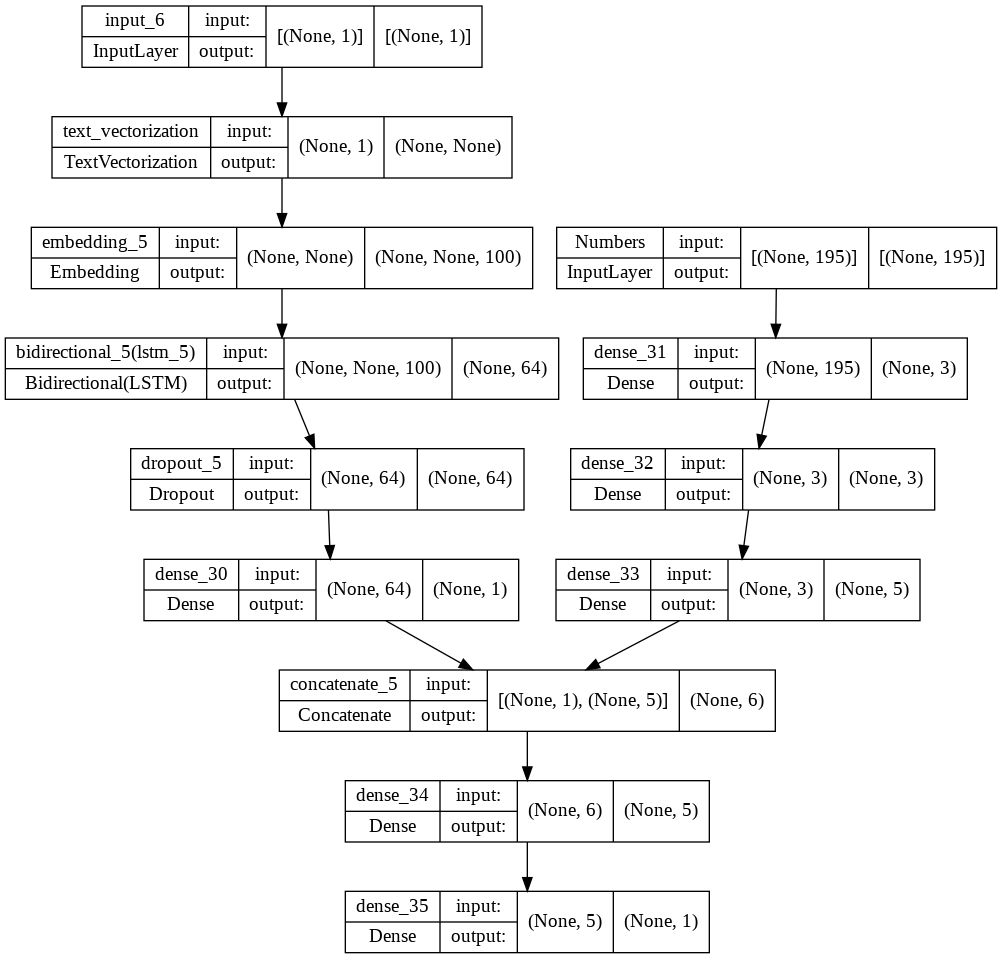

In [ ]:
def build_model_GloVe():
    inputs = keras.layers.Input(shape=(1), dtype="string") # We take our strings as input 
    processing = text_vectorization(inputs)
    
    embedding = embedding_layer(processing)
    
    x = keras.layers.Bidirectional(keras.layers.LSTM(32))(embedding)
    x = keras.layers.Dropout(0.5)(x)
    outputs = keras.layers.Dense(1, activation="sigmoid")(x)

    # Define numeric input branch
    input_numeric = keras.layers.Input(numeric_cate_subset.shape[1],name="Numbers")
    x = keras.layers.Dense(3,activation="relu")(input_numeric)
    x = keras.layers.Dense(3,activation="relu")(x)
    numeric_output = keras.layers.Dense(5,activation="linear")(x) #Another option might be to have dense matrices that are wider, and you reshape them to 28x28x3 to add.

    merge = keras.layers.Concatenate()([outputs,numeric_output])
    x = keras.layers.Dense(5,activation="relu")(merge)
    final_output = keras.layers.Dense(1)(x)
 
    model = keras.Model(inputs=[inputs, input_numeric],outputs = final_output)
    model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=['accuracy'])
    return model
    

model_GloVe = build_model_GloVe()

keras.utils.plot_model(model_GloVe, show_shapes=True)

In [ ]:
k = 4
num_validation_samples = len(data_train) // k
num_epochs = 25
batch_sizes = 25
all_loss_histories = []
all_val_loss_histories = []  
all_acc_histories = []
all_val_acc_histories = []

# For each validation fold, we will train a full set of epochs, and store the history. 
for fold in range(k):
    validation_data = data_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    validation_text = num_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    validation_targets = labels_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    training_text = np.concatenate([
        num_train[:num_validation_samples * fold],
        num_train[num_validation_samples * (fold + 1):]])                       
    training_data = np.concatenate([
        data_train[:num_validation_samples * fold],
        data_train[num_validation_samples * (fold + 1):]])
    training_targets = np.concatenate([
        labels_train[:num_validation_samples * fold],
        labels_train[num_validation_samples * (fold + 1):]])
    model = build_model_GloVe()
    history = model.fit([training_data, training_text], training_targets, 
                        validation_data = ([validation_data,validation_text],validation_targets), 
                        epochs=num_epochs, batch_size=batch_sizes)
    val_loss_history = history.history['val_loss']
    val_acc_history = history.history['val_accuracy']
    loss_history = history.history['loss']
    acc_history = history.history['accuracy']
    all_val_loss_histories.append(val_loss_history)
    all_loss_histories.append(loss_history)
    all_val_acc_histories.append(val_acc_history)
    all_acc_histories.append(acc_history)

average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_val_loss_history = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
average_val_acc_history = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]

Epoch 1/25
376/376 [==============================] - 41s 81ms/step - loss: 0.7017 - accuracy: 0.9516 - val_loss: 0.7690 - val_accuracy: 0.9501
Epoch 2/25
376/376 [==============================] - 27s 70ms/step - loss: 0.7460 - accuracy: 0.9516 - val_loss: 0.7690 - val_accuracy: 0.9501
Epoch 3/25
376/376 [==============================] - 27s 71ms/step - loss: 0.7460 - accuracy: 0.9516 - val_loss: 0.7690 - val_accuracy: 0.9501
Epoch 4/25
376/376 [==============================] - 27s 71ms/step - loss: 0.7460 - accuracy: 0.9516 - val_loss: 0.7690 - val_accuracy: 0.9501
Epoch 5/25
376/376 [==============================] - 27s 71ms/step - loss: 0.7460 - accuracy: 0.9516 - val_loss: 0.7690 - val_accuracy: 0.9501
Epoch 6/25
376/376 [==============================] - 27s 71ms/step - loss: 0.7460 - accuracy: 0.9516 - val_loss: 0.7690 - val_accuracy: 0.9501
Epoch 7/25
376/376 [==============================] - 27s 71ms/step - loss: 0.7460 - accuracy: 0.9516 - val_loss: 0.7690 - val_accuracy:

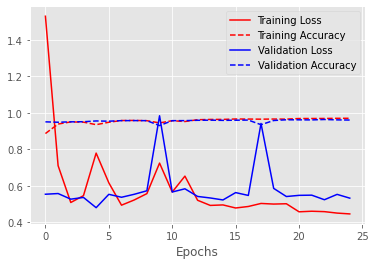

In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

plt.plot(average_loss_history,c='r')
plt.plot(average_acc_history,c="r",linestyle="dashed")
plt.plot(average_val_loss_history,c='b')
plt.plot(average_val_acc_history,c='b',linestyle="dashed")
plt.xlabel("Epochs")
plt.legend(['Training Loss','Training Accuracy','Validation Loss','Validation Accuracy'])
plt.show()

In [ ]:
data_test.shape

(5363,)

In [ ]:
model_glove = build_model_GloVe()
model_glove.fit([data_train,num_train], labels_train, epochs=9,batch_size=25)

test_acc = model_glove.evaluate([data_test, num_test], labels_test)[1]*100
print(f'The resulting model is about {test_acc:.2f}% accurate in the holdout sample.')

Epoch 1/9
501/501 [==============================] - 43s 65ms/step - loss: 2.4797 - accuracy: 0.8369
Epoch 2/9
501/501 [==============================] - 31s 62ms/step - loss: 2.4691 - accuracy: 0.8385
Epoch 3/9
501/501 [==============================] - 31s 61ms/step - loss: 2.4680 - accuracy: 0.8385
Epoch 4/9
501/501 [==============================] - 31s 62ms/step - loss: 2.4691 - accuracy: 0.8385
Epoch 5/9
501/501 [==============================] - 31s 61ms/step - loss: 2.4691 - accuracy: 0.8385
Epoch 6/9
501/501 [==============================] - 31s 61ms/step - loss: 2.4691 - accuracy: 0.8385
Epoch 7/9
501/501 [==============================] - 31s 61ms/step - loss: 2.4691 - accuracy: 0.8385
Epoch 8/9
501/501 [==============================] - 31s 61ms/step - loss: 2.4691 - accuracy: 0.8385
Epoch 9/9
168/168 [==============================] - 9s 32ms/step - loss: 2.4376 - accuracy: 0.8406
The resulting model is about 84.06% accurate in the holdout sample.


##Sentiment analysis

In [39]:
# setup the afinn "model"
afinn = Afinn()

df.fillna('',inplace=True)
afinn_score_list=[]
i=0
while (i < len(df)):
  if (df['description'][i]==''): afinn_score_list.append(0)
  else:
    print(i,afinn.score(df['description'][i]))
    test = afinn.score(df['description'][i])
    afinn_score_list.append(test)
  i=i+1
afinn_score_list

Streaming output truncated to the last 5000 lines.
12879 3.0
12880 10.0
12881 12.0
12882 16.0
12883 5.0
12884 26.0
12885 17.0
12886 24.0
12887 17.0
12888 4.0
12889 2.0
12890 6.0
12891 3.0
12892 6.0
12893 14.0
12894 14.0
12895 17.0
12896 4.0
12897 22.0
12898 15.0
12899 3.0
12900 0.0
12901 5.0
12902 4.0
12903 4.0
12904 9.0
12905 6.0
12906 13.0
12907 38.0
12908 3.0
12909 3.0
12910 21.0
12911 28.0
12912 8.0
12913 18.0
12914 9.0
12915 16.0
12916 10.0
12917 30.0
12918 24.0
12919 11.0
12920 82.0
12921 6.0
12922 10.0
12923 10.0
12924 11.0
12925 14.0
12926 25.0
12927 6.0
12928 19.0
12929 16.0
12930 12.0
12931 63.0
12932 45.0
12933 0.0
12934 27.0
12935 33.0
12936 38.0
12937 23.0
12938 27.0
12939 5.0
12940 0.0
12941 5.0
12942 1.0
12943 45.0
12944 22.0
12945 54.0
12946 14.0
12947 35.0
12948 24.0
12949 23.0
12950 12.0
12951 16.0
12952 8.0
12953 43.0
12954 22.0
12955 2.0
12956 11.0
12957 3.0
12958 5.0
12959 23.0
12960 20.0
12961 23.0
12962 27.0
12963 3.0
12964 26.0
12965 62.0
12966 4.0
12967 3.0
129

[43.0,
 10.0,
 54.0,
 17.0,
 78.0,
 4.0,
 45.0,
 0.0,
 6.0,
 44.0,
 10.0,
 21.0,
 -7.0,
 23.0,
 28.0,
 10.0,
 5.0,
 54.0,
 4.0,
 25.0,
 29.0,
 17.0,
 26.0,
 6.0,
 49.0,
 3.0,
 10.0,
 30.0,
 6.0,
 19.0,
 5.0,
 28.0,
 29.0,
 3.0,
 3.0,
 3.0,
 36.0,
 36.0,
 11.0,
 3.0,
 3.0,
 2.0,
 6.0,
 21.0,
 9.0,
 1.0,
 12.0,
 3.0,
 11.0,
 7.0,
 12.0,
 4.0,
 35.0,
 10.0,
 9.0,
 10.0,
 -6.0,
 20.0,
 8.0,
 3.0,
 10.0,
 3.0,
 6.0,
 6.0,
 6.0,
 1.0,
 6.0,
 12.0,
 3.0,
 14.0,
 14.0,
 6.0,
 3.0,
 13.0,
 19.0,
 3.0,
 14.0,
 24.0,
 9.0,
 3.0,
 21.0,
 31.0,
 6.0,
 6.0,
 21.0,
 11.0,
 10.0,
 51.0,
 3.0,
 19.0,
 3.0,
 31.0,
 8.0,
 10.0,
 18.0,
 7.0,
 8.0,
 13.0,
 3.0,
 4.0,
 3.0,
 11.0,
 6.0,
 3.0,
 99.0,
 16.0,
 17.0,
 38.0,
 52.0,
 7.0,
 12.0,
 6.0,
 20.0,
 13.0,
 19.0,
 25.0,
 4.0,
 14.0,
 3.0,
 10.0,
 8.0,
 3.0,
 3.0,
 8.0,
 3.0,
 5.0,
 13.0,
 17.0,
 15.0,
 13.0,
 31.0,
 8.0,
 3.0,
 9.0,
 3.0,
 5.0,
 10.0,
 21.0,
 6.0,
 3.0,
 6.0,
 15.0,
 1.0,
 8.0,
 1.0,
 5.0,
 3.0,
 5.0,
 54.0,
 13.0,
 3.0,
 39.0,
 42.0,
 1

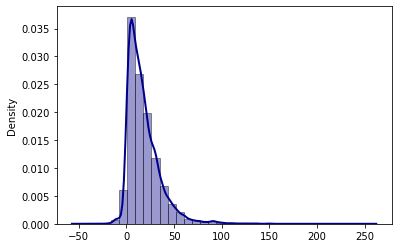

In [27]:
sns.distplot(afinn_score_list, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

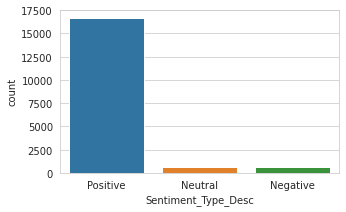

In [28]:
from textblob import TextBlob
bloblist_desc = list()

df_description=df['description'].astype(str)
for row in df_description:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(df_polarity_desc):
    if df_polarity_desc['sentiment'] > 0:
        sentiment = "Positive"
    elif df_polarity_desc['sentiment'] == 0:
        sentiment = "Neutral"
    else:
        sentiment = "Negative"
    return sentiment

df_polarity_desc['Sentiment_Type_Desc'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(5,3))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type_Desc", data=df_polarity_desc)

##Word Cloud

In [16]:
from pyparsing.core import Word
def wordcloud(text):
  wc = WordCloud(background_color='white')
  st=''
  for i in text:
    st+=i
  wordcloud = wc.generate(st)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

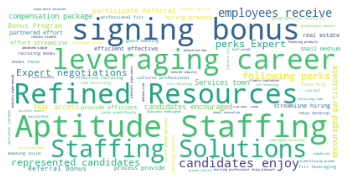

In [22]:
wordcloud(df[df['fraudulent']==1].company_profile)

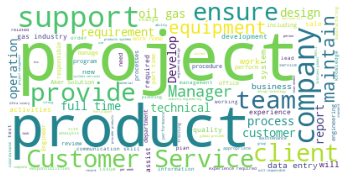

In [23]:
wordcloud(df[df['fraudulent']==1].description)

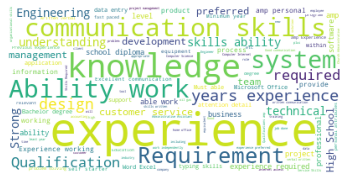

In [24]:
wordcloud(df[df['fraudulent']==1].requirements)

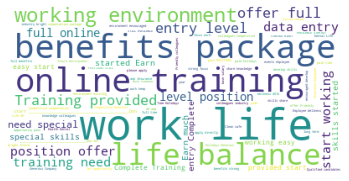

In [25]:
wordcloud(df[df['fraudulent']==1].benefits)